# Milestone 5: Morphology helper

Setup

In [1]:
import getpass
import logging
from pathlib import Path

%matplotlib inline
import neurom.view

from bluepysnap.api import Api

logging.basicConfig(level=logging.WARNING)

ORGANIZATION = "bbp"
PROJECT = "thalamus"

Paste the token from https://bbp.epfl.ch/nexus/web/

In [2]:
TOKEN = getpass.getpass()

 ·······································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································

In [3]:
api = Api(bucket=f"{ORGANIZATION}/{PROJECT}", token=TOKEN, debug=False)

### From a KG URL retrieve a Morphology Collection

In [4]:
morphology_release_id = "https://bbp.epfl.ch/neurosciencegraph/data/20191208"
morphology_release = api.get_entity_by_id(morphology_release_id)
print(morphology_release)

Entity(resource_id=<https://bbp.epfl.ch/neurosciencegraph/data/20191208>, resource_type=<MorphologyRelease>, instance_type=<Proxy>)


### Get information related to a Morphology Collection

In [5]:
print("Description:", morphology_release.description)
print("Creator:", morphology_release.createdBy)
print("Creation date:", morphology_release.createdAt)
print("Project:", morphology_release.project)
print("Species:", morphology_release.species.label)
print("Brain region:", morphology_release.brainLocation.brainRegion.label)

Description: Number of morphologies:170730; layers:[VPL, Rt]; mtypes:[VPL_TC, VPL_IN, Rt_RC]
Creator: https://bbp.epfl.ch/nexus/v1/realms/bbp/users/iavarone
Creation date: 2019-12-09T11:11:13.179Z
Project: https://bbp.epfl.ch/nexus/v1/projects/bbp/thalamus
Species: Mouse
Brain region: Thalamus


### Retrieve and access a nested resource

In [6]:
print(morphology_release.morphologyIndex.distribution.url)

file:///gpfs/bbp.cscs.ch/project/proj82/home/iavarone/morphology_release/20191208/09_CloneMorphologies-h5v1/neurondb.dat


### Show the wrapped Nexus resource as json

In [7]:
api.as_json(morphology_release)

{'id': 'https://bbp.epfl.ch/neurosciencegraph/data/20191208',
 'type': 'MorphologyRelease',
 'brainLocation': {'brainRegion': {'id': 'http://api.brain-map.org/api/v2/data/Structure/549',
   'label': 'Thalamus'}},
 'description': 'Number of morphologies:170730; layers:[VPL, Rt]; mtypes:[VPL_TC, VPL_IN, Rt_RC]',
 'distribution': {'type': 'DataDownload',
  'encodingFormat': 'application/h5',
  'url': 'file:///gpfs/bbp.cscs.ch/project/proj82/home/iavarone/morphology_release/20191208/09_CloneMorphologies-h5v1'},
 'morphologyIndex': {'id': 'https://bbp.epfl.ch/neurosciencegraph/data/release_index_20191208',
  'type': 'ModelReleaseIndex'},
 'name': '20191208',
 'species': {'id': 'http://purl.obolibrary.org/obo/NCBITaxon_10088',
  'label': 'Mouse'},
 'wasAttributedTo': [{'id': 'https://bbp.epfl.ch/neurosciencegraph/data/baf46928-a799-4059-9035-273486a82dbd',
   'type': 'WorkflowExecution'}],
 '_constrainedBy': 'https://bluebrain.github.io/nexus/schemas/unconstrained.json',
 '_createdAt': '2019

### Show the wrapped Nexus resource as dataframe

In [8]:
api.as_dataframe([morphology_release]).T

,0
id,https://bbp.epfl.ch/neurosciencegraph/data/201...
type,MorphologyRelease
brainLocation.brainRegion.id,http://api.brain-map.org/api/v2/data/Structure...
brainLocation.brainRegion.label,Thalamus
description,"Number of morphologies:170730; layers:[VPL, Rt..."
distribution.type,DataDownload
distribution.encodingFormat,application/h5
distribution.url,file:///gpfs/bbp.cscs.ch/project/proj82/home/i...
morphologyIndex.id,https://bbp.epfl.ch/neurosciencegraph/data/rel...
morphologyIndex.type,ModelReleaseIndex


### Instantiate a MorphDB object from a Morphology Collection and a unique identifier

In [9]:
# this can be slow
morphology_release.instance

In [10]:
df = morphology_release.instance.df
df.head()

,name,mtype,msubtype,mtype_no_subtype,layer,label,path,use_axon,use_dendrites,axon_repair,dendrite_repair,basal_dendrite_repair,tuft_dendrite_repair,oblique_dendrite_repair,unravel,use_for_stats,axon_inputs
0,dend-jy180307_A_idA_axon-AA0348_-_Scale_x1.000...,VPL_TC,,VPL_TC,VPL,default,/gpfs/bbp.cscs.ch/project/proj82/home/iavarone...,True,True,True,True,True,True,True,True,True,[]
1,dend-jy180307_A_idA_axon-AA0348_-_Scale_x1.000...,VPL_TC,,VPL_TC,VPL,default,/gpfs/bbp.cscs.ch/project/proj82/home/iavarone...,True,True,True,True,True,True,True,True,True,[]
2,dend-jy180307_A_idA_axon-AA0348_-_Scale_x1.000...,VPL_TC,,VPL_TC,VPL,default,/gpfs/bbp.cscs.ch/project/proj82/home/iavarone...,True,True,True,True,True,True,True,True,True,[]
3,dend-jy180307_A_idA_axon-AA0348_-_Scale_x1.000...,VPL_TC,,VPL_TC,VPL,default,/gpfs/bbp.cscs.ch/project/proj82/home/iavarone...,True,True,True,True,True,True,True,True,True,[]
4,dend-jy180307_A_idA_axon-AA0348_-_Scale_x1.000...,VPL_TC,,VPL_TC,VPL,default,/gpfs/bbp.cscs.ch/project/proj82/home/iavarone...,True,True,True,True,True,True,True,True,True,[]


In [11]:
df["mtype"].value_counts()

VPL_TC    154440
Rt_RC      11700
VPL_IN      4590
Name: mtype, dtype: int64

### Get the morphologies from the morphology release entity

#### From a morphology release df
This method requires access to the internal df that can depend on the library used to open the morphology release, so it's not recommended unless needed for performance or flexibility reasons.

In [12]:
df = morphology_release.instance.df

In [13]:
from bluepysnap.api.wrappers import wrap_morphology_dataframe_as_entities

In [14]:
morphologies = wrap_morphology_dataframe_as_entities(df[df['mtype'] == 'VPL_IN'], api)
len(morphologies)

4590

In [15]:
morphologies = wrap_morphology_dataframe_as_entities(df.iloc[0:2], api)
len(morphologies)

2

### Plot a morphology

In [16]:
morphology = morphologies[0]
print(type(morphology.instance))
print(morphology.instance.__class__)

<class 'Proxy'>
<class 'neurom.core.morphology.Morphology'>


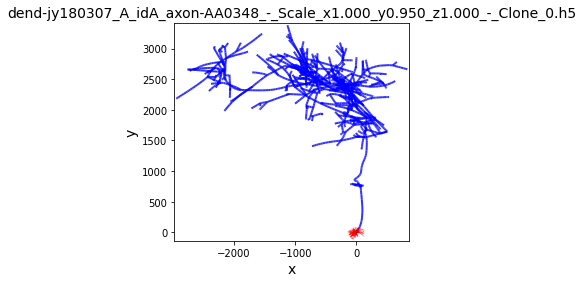

In [17]:
neurom.view.matplotlib_impl.plot_morph(morphology.instance)

### Get the mean soma radius of a subsample of Rt cells of the morphology release

In [18]:
morphologies = wrap_morphology_dataframe_as_entities(
    df[df["layer"] == "Rt"].iloc[:100], # first 100 
    api)

In [19]:
import neurom as nm
from neurom.core.population import Population
# this can be slow on the first execution
population = Population([m.instance for m in morphologies])

In [20]:
import numpy as np
print(np.mean(nm.get('soma_radius', population)))

10.688371
